## Homework #13 - Clustering Algorithms. Gaussian Mixture Model

### Overview:
You already got to know the clustering problem in Machine Learning.
Also, you met one of the business problems where these algorithms are
used - customer segmentation. Today you are going to practice this
knowledge on a very similar task.

### Task:
For this chapter, you will have to do the following:
* Bring all columns into a numeric form: applying mapping or dummy
variables.
* If you think it can be helpful, you may apply feature scaling.
* Using Silhouette score, find the best number of clusters for GMM
(implemented in sklearn.)
* Plot the process of choosing the best number of clusters for each
algorithm and try to explain.
* Cluster the Data Set using GMM.
* Extract from the GMM algorithm the centroids.
* Build the following table for the algorithm, and fill the table with
the means of the clusters.

<div align="center">

|           | feature_1 | feature_2 | ... | feature m |
|:---------:|:---------:|:---------:|:---:|:---------:|
| cluster 1 |           |           |     |           |
| cluster 2 |           |           |     |           |
|    ...    |           |           |     |           |
| cluster n |           |           |     |           |

</div>

* Make a conclusion based on the table you got and create an imaginary customer for every cluster.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer

In [2]:
customer_personality_dataset = pd.read_csv('dataset/marketing_campaign.csv', sep='\t')

In [3]:
customer_personality_dataset.head(n=5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
customer_personality_dataset.tail(n=5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


### Data Cleaning

In [5]:
customer_personality_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
customer_personality_dataset.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], inplace=True)
customer_personality_dataset

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,5,10,3,0,0,0,0,0,0,0


In [7]:
object_columns = customer_personality_dataset.select_dtypes(include=['object']).columns
print(f'Object Columns: {object_columns.to_list()}')
for column_name in object_columns:
    print(f"Column Name = {column_name}: Unique Values = {customer_personality_dataset[column_name].unique()}")

Object Columns: ['Education', 'Marital_Status', 'Dt_Customer']
Column Name = Education: Unique Values = ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Column Name = Marital_Status: Unique Values = ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Column Name = Dt_Customer: Unique Values = ['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013' '27-05-2013' '20-02-2013'
 '31-05-2013' '22-11-2013' '22-05-2014' '11-05-2013' '29-10-2012'
 '29-08-2013' '31-12-2013' '02-09-2013' '11-02-2014' '01-02-2013'
 '29-04-2013' '12-03-2013' '05-11-2013' '02-10-2013' '28-06-2014'
 '09-11-2012' '24-05-2013' '01-01-2014' '08-11-2012' '12-05-2014'
 '11-08-2012' '07-06-2014' '12-06-2013' '19-11-2012' '02-04-2013'
 '28-04-2014' '17-06-20

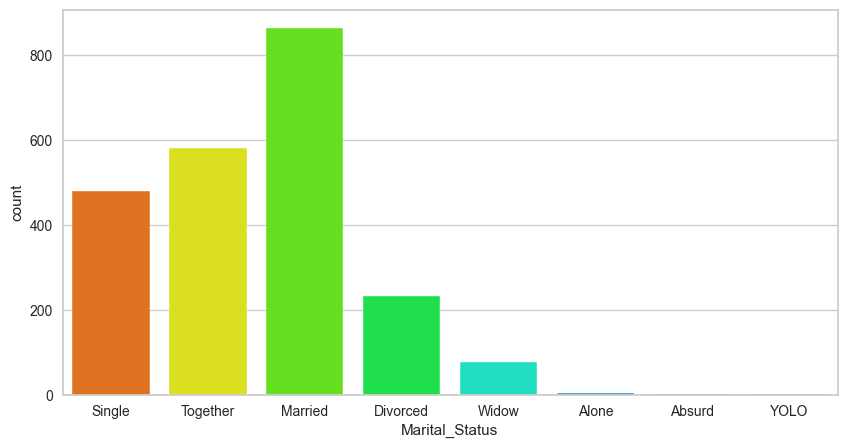

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(data=customer_personality_dataset, x='Marital_Status', hue='Marital_Status', palette='gist_rainbow')
plt.show()

In [9]:
customer_personality_dataset['Marital_Status'] = customer_personality_dataset['Marital_Status'].apply(
    lambda status: 'In_Relationship' if status in ['Married', 'Together'] else 'Single'
)
customer_personality_dataset.rename({'Marital_Status': 'Relationship_Status'}, axis=1, inplace=True)

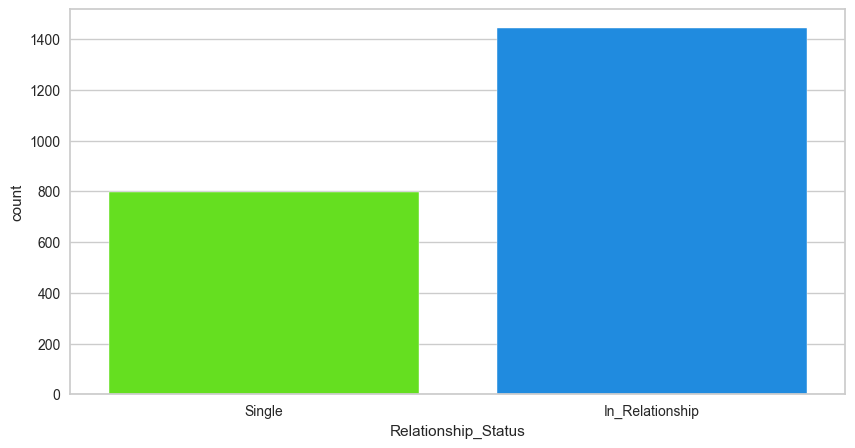

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(data=customer_personality_dataset, x='Relationship_Status', hue='Relationship_Status', palette='gist_rainbow')
plt.show()

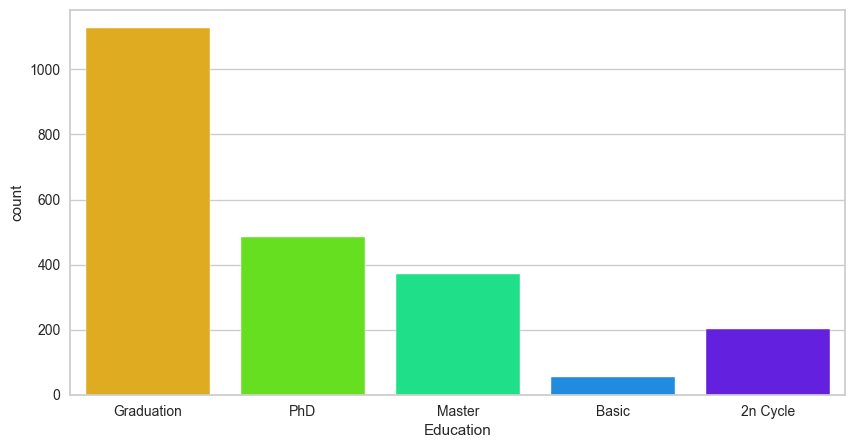

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(data=customer_personality_dataset, x='Education', hue='Education', palette='gist_rainbow')
plt.show()

In [12]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
customer_personality_dataset['Total_Spending'] = customer_personality_dataset[spending_columns].sum(axis=1)
customer_personality_dataset

,Year_Birth,Education,Relationship_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spending
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,4,7,0,0,0,0,0,0,1,1617
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,2,5,0,0,0,0,0,0,0,27
2,1965,Graduation,In_Relationship,71613.0,0,0,21-08-2013,26,426,49,...,10,4,0,0,0,0,0,0,0,776
3,1984,Graduation,In_Relationship,26646.0,1,0,10-02-2014,26,11,4,...,4,6,0,0,0,0,0,0,0,53
4,1981,PhD,In_Relationship,58293.0,1,0,19-01-2014,94,173,43,...,6,5,0,0,0,0,0,0,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,In_Relationship,61223.0,0,1,13-06-2013,46,709,43,...,4,5,0,0,0,0,0,0,0,1341
2236,1946,PhD,In_Relationship,64014.0,2,1,10-06-2014,56,406,0,...,5,7,0,0,0,1,0,0,0,444
2237,1981,Graduation,Single,56981.0,0,0,25-01-2014,91,908,48,...,13,6,0,1,0,0,0,0,0,1241
2238,1956,Master,In_Relationship,69245.0,0,1,24-01-2014,8,428,30,...,10,3,0,0,0,0,0,0,0,843


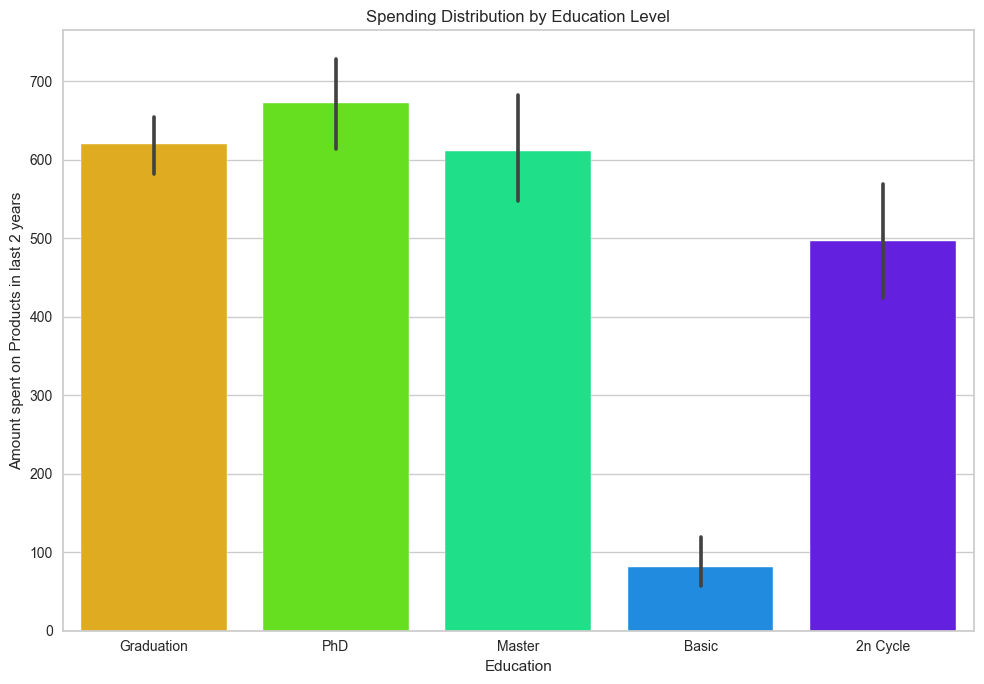

In [13]:
plt.figure(figsize=(10, 7))

sns.barplot(
    data=customer_personality_dataset,
    x='Education',
    hue='Education',
    y=customer_personality_dataset[spending_columns].sum(axis=1),
    palette='gist_rainbow'
)

plt.title('Spending Distribution by Education Level')
plt.ylabel('Amount spent on Products in last 2 years')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_11956\4028882526.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_11956\4028882526.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_11956\4028882526.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_11956\4028882526.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and 

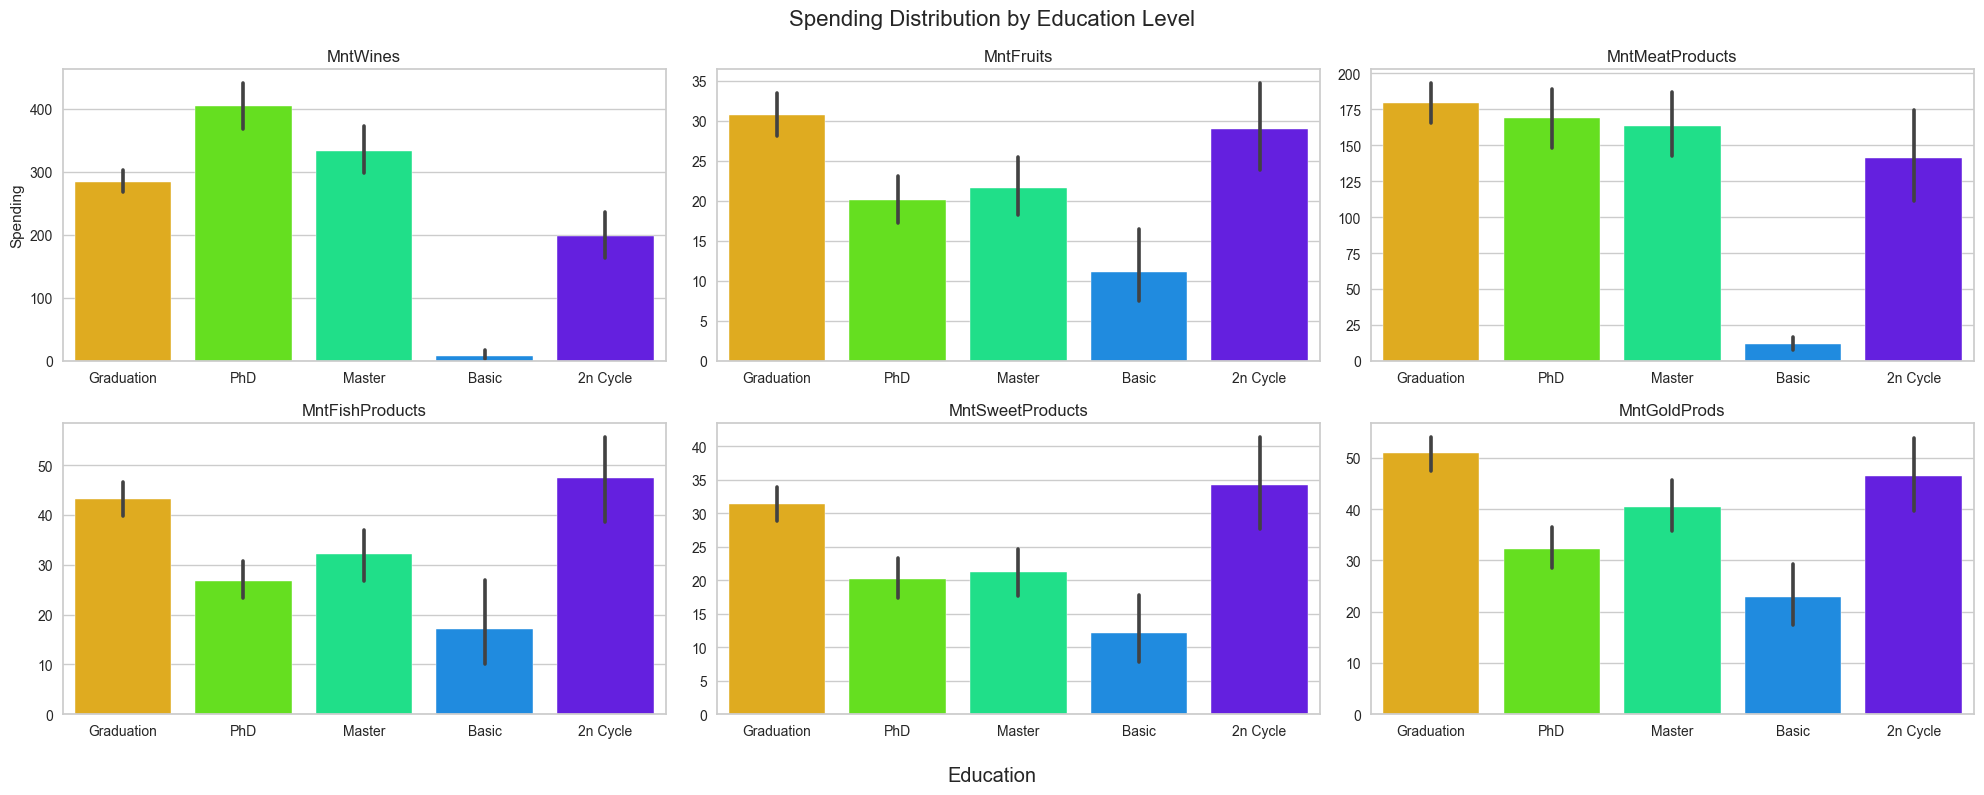

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(20, 8))
axes = axes.flatten()

for i, col in enumerate(spending_columns):
    sns.barplot(
        data=customer_personality_dataset,
        x='Education',
        y=col,
        palette='gist_rainbow',
        ax=axes[i]
    )
    axes[i].set_title(spending_columns[i])
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Spending' if i == 0 else '')

fig.suptitle('Spending Distribution by Education Level', fontsize=16)
fig.supxlabel('Education')
plt.tight_layout()
plt.show()


In [15]:
purchases_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
customer_personality_dataset['Total_Purchases'] = customer_personality_dataset[purchases_columns].sum(axis=1)
customer_personality_dataset

,Year_Birth,Education,Relationship_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spending,Total_Purchases
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,1,1617,22
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,0,27,4
2,1965,Graduation,In_Relationship,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,0,776,20
3,1984,Graduation,In_Relationship,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,0,53,6
4,1981,PhD,In_Relationship,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,0,422,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,In_Relationship,61223.0,0,1,13-06-2013,46,709,43,...,5,0,0,0,0,0,0,0,1341,16
2236,1946,PhD,In_Relationship,64014.0,2,1,10-06-2014,56,406,0,...,7,0,0,0,1,0,0,0,444,15
2237,1981,Graduation,Single,56981.0,0,0,25-01-2014,91,908,48,...,6,0,1,0,0,0,0,0,1241,18
2238,1956,Master,In_Relationship,69245.0,0,1,24-01-2014,8,428,30,...,3,0,0,0,0,0,0,0,843,21


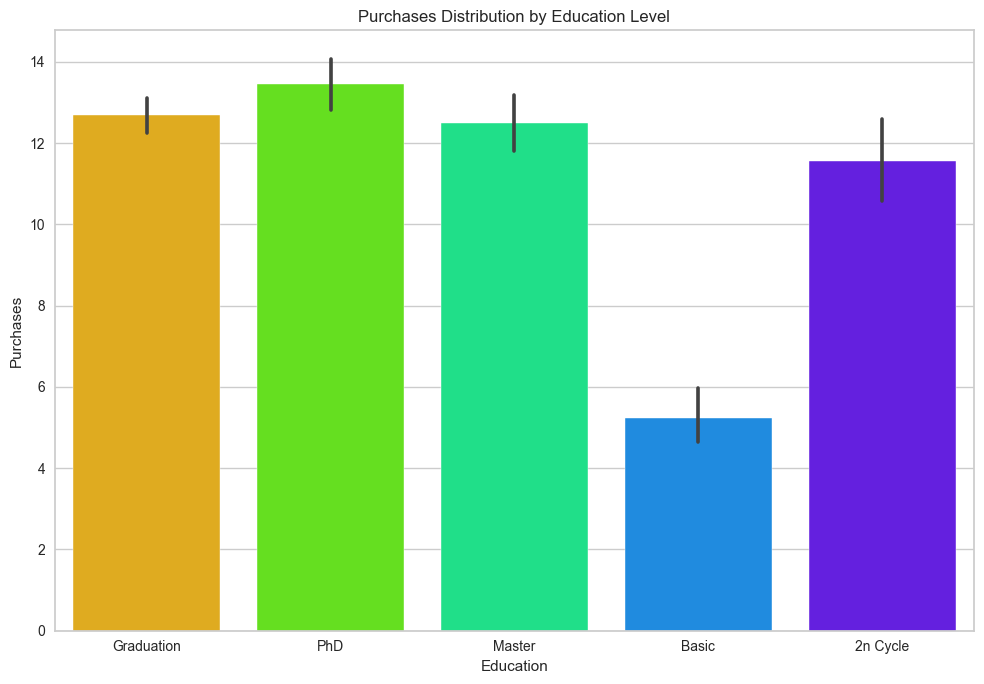

In [16]:
plt.figure(figsize=(10, 7))

sns.barplot(
    data=customer_personality_dataset,
    x='Education',
    hue='Education',
    y=customer_personality_dataset[purchases_columns].sum(axis=1),
    palette='gist_rainbow'
)

plt.title('Purchases Distribution by Education Level')
plt.ylabel('Purchases')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_11956\3588145138.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_11956\3588145138.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_11956\3588145138.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


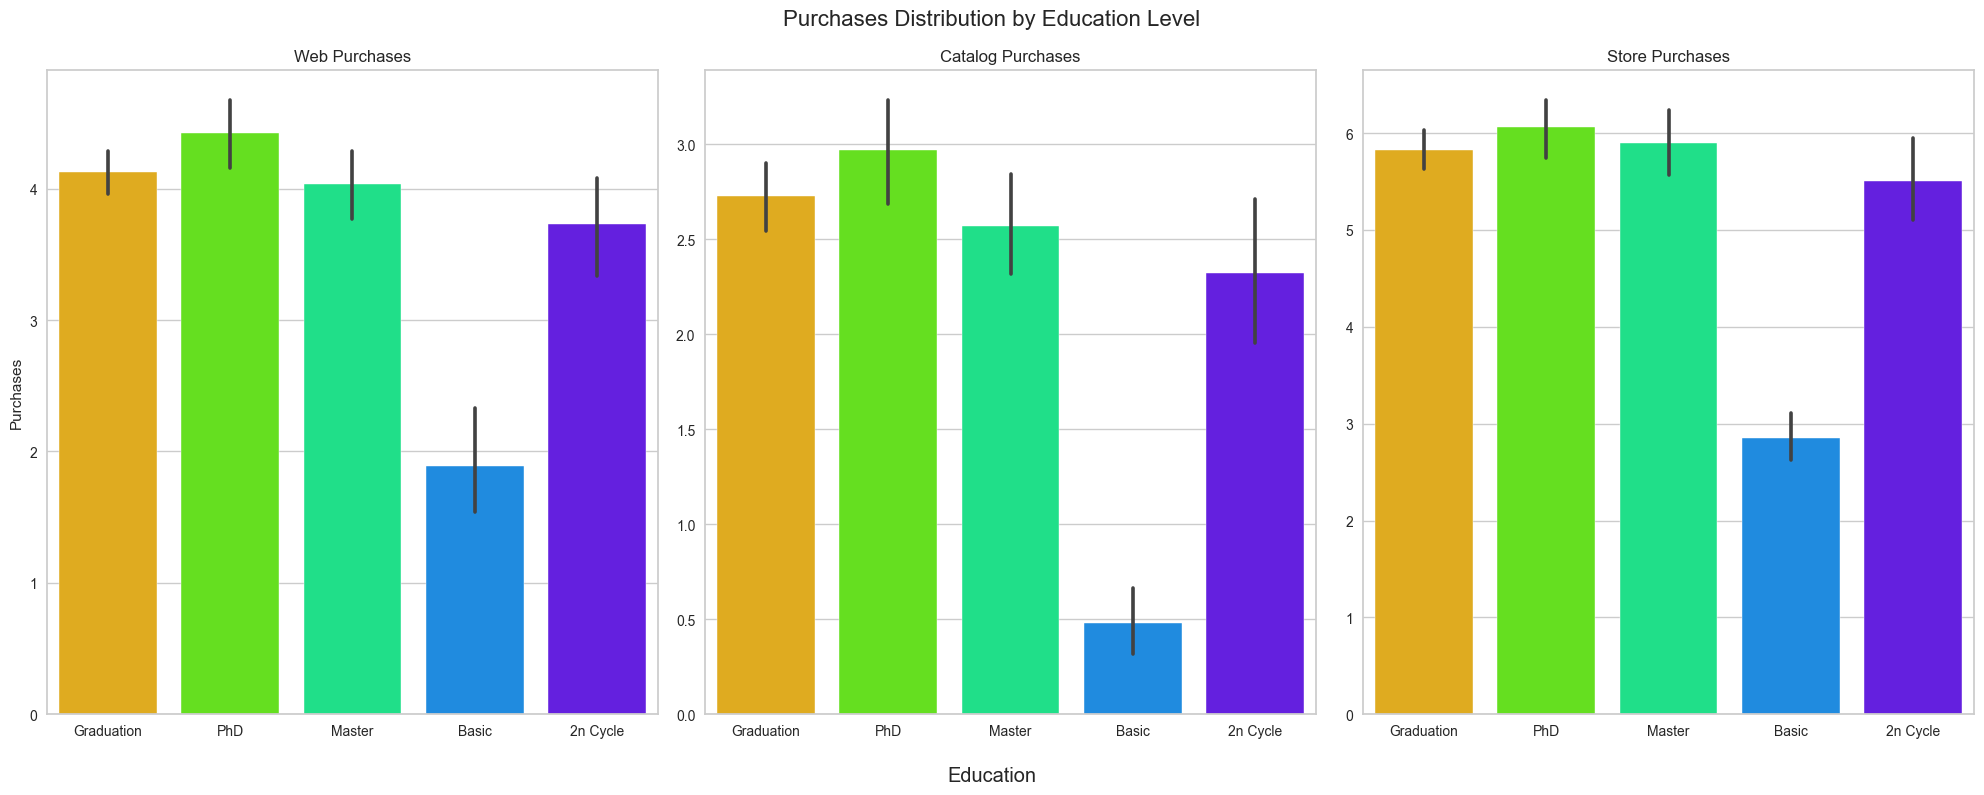

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

titles = ['Web Purchases', 'Catalog Purchases', 'Store Purchases']

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

for i, col in enumerate(purchases_columns):
    sns.barplot(
        data=customer_personality_dataset,
        x='Education',
        y=col,
        palette='gist_rainbow',
        ax=axes[i]
    )
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Purchases' if i == 0 else '')

fig.suptitle('Purchases Distribution by Education Level', fontsize=16)
fig.supxlabel('Education')
plt.tight_layout()
plt.show()


In [18]:
children_columns = ['Kidhome', 'Teenhome']
customer_personality_dataset['Total_Children'] = customer_personality_dataset[children_columns].sum(axis=1)
customer_personality_dataset

,Year_Birth,Education,Relationship_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spending,Total_Purchases,Total_Children
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,0,1,1617,22,0
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,0,0,27,4,2
2,1965,Graduation,In_Relationship,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,0,776,20,0
3,1984,Graduation,In_Relationship,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,0,0,53,6,1
4,1981,PhD,In_Relationship,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,0,0,422,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,In_Relationship,61223.0,0,1,13-06-2013,46,709,43,...,0,0,0,0,0,0,0,1341,16,1
2236,1946,PhD,In_Relationship,64014.0,2,1,10-06-2014,56,406,0,...,0,0,0,1,0,0,0,444,15,3
2237,1981,Graduation,Single,56981.0,0,0,25-01-2014,91,908,48,...,0,1,0,0,0,0,0,1241,18,0
2238,1956,Master,In_Relationship,69245.0,0,1,24-01-2014,8,428,30,...,0,0,0,0,0,0,0,843,21,1


In [19]:
customer_personality_dataset['Dt_Customer'] = pd.to_datetime(customer_personality_dataset['Dt_Customer'], format = '%d-%m-%Y')
customer_personality_dataset

,Year_Birth,Education,Relationship_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spending,Total_Purchases,Total_Children
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,0,1,1617,22,0
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,0,27,4,2
2,1965,Graduation,In_Relationship,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,0,776,20,0
3,1984,Graduation,In_Relationship,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,0,53,6,1
4,1981,PhD,In_Relationship,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,0,422,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,In_Relationship,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,0,0,0,1341,16,1
2236,1946,PhD,In_Relationship,64014.0,2,1,2014-06-10,56,406,0,...,0,0,0,1,0,0,0,444,15,3
2237,1981,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,...,0,1,0,0,0,0,0,1241,18,0
2238,1956,Master,In_Relationship,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,0,0,843,21,1


In [20]:
latest_date = customer_personality_dataset['Dt_Customer'].max() + pd.offsets.YearBegin(1)
latest_date

Timestamp('2015-01-01 00:00:00')

In [21]:
customer_personality_dataset['Customer_Tenure'] = (latest_date - customer_personality_dataset['Dt_Customer']).dt.days
customer_personality_dataset

,Year_Birth,Education,Relationship_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spending,Total_Purchases,Total_Children,Customer_Tenure
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,1,1617,22,0,849
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,27,4,2,299
2,1965,Graduation,In_Relationship,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,776,20,0,498
3,1984,Graduation,In_Relationship,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,53,6,1,325
4,1981,PhD,In_Relationship,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,422,14,1,347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,In_Relationship,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,0,0,1341,16,1,567
2236,1946,PhD,In_Relationship,64014.0,2,1,2014-06-10,56,406,0,...,0,0,1,0,0,0,444,15,3,205
2237,1981,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,...,1,0,0,0,0,0,1241,18,0,341
2238,1956,Master,In_Relationship,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,0,843,21,1,342


In [22]:
customer_personality_dataset['Age'] = latest_date.year - customer_personality_dataset['Year_Birth']
customer_personality_dataset

,Year_Birth,Education,Relationship_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spending,Total_Purchases,Total_Children,Customer_Tenure,Age
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,1,1617,22,0,849,58
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,27,4,2,299,61
2,1965,Graduation,In_Relationship,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,776,20,0,498,50
3,1984,Graduation,In_Relationship,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,53,6,1,325,31
4,1981,PhD,In_Relationship,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,422,14,1,347,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,In_Relationship,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,0,1341,16,1,567,48
2236,1946,PhD,In_Relationship,64014.0,2,1,2014-06-10,56,406,0,...,0,1,0,0,0,444,15,3,205,69
2237,1981,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,...,0,0,0,0,0,1241,18,0,341,34
2238,1956,Master,In_Relationship,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,843,21,1,342,59


### Data Preprocessing

In [23]:
customer_personality_dataset['Relationship_Status'] = customer_personality_dataset['Relationship_Status'].map({'Single': 1, 'In_Relationship': 0})
customer_personality_dataset.rename(columns={'Relationship_Status': 'Is_Single'}, inplace=True)
customer_personality_dataset

,Year_Birth,Education,Is_Single,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spending,Total_Purchases,Total_Children,Customer_Tenure,Age
0,1957,Graduation,1,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,1,1617,22,0,849,58
1,1954,Graduation,1,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,27,4,2,299,61
2,1965,Graduation,0,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,776,20,0,498,50
3,1984,Graduation,0,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,53,6,1,325,31
4,1981,PhD,0,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,422,14,1,347,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,0,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,0,1341,16,1,567,48
2236,1946,PhD,0,64014.0,2,1,2014-06-10,56,406,0,...,0,1,0,0,0,444,15,3,205,69
2237,1981,Graduation,1,56981.0,0,0,2014-01-25,91,908,48,...,0,0,0,0,0,1241,18,0,341,34
2238,1956,Master,0,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,843,21,1,342,59


In [24]:
customer_personality_dataset['Education'] = customer_personality_dataset['Education'].map(
    {
        'Basic': 0,
        '2n Cycle': 1,
        'Graduation': 2,
        'Master': 3,
        'PhD': 4
    }
)
customer_personality_dataset

,Year_Birth,Education,Is_Single,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spending,Total_Purchases,Total_Children,Customer_Tenure,Age
0,1957,2,1,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,1,1617,22,0,849,58
1,1954,2,1,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,27,4,2,299,61
2,1965,2,0,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,776,20,0,498,50
3,1984,2,0,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,53,6,1,325,31
4,1981,4,0,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,422,14,1,347,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,0,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,0,1341,16,1,567,48
2236,1946,4,0,64014.0,2,1,2014-06-10,56,406,0,...,0,1,0,0,0,444,15,3,205,69
2237,1981,2,1,56981.0,0,0,2014-01-25,91,908,48,...,0,0,0,0,0,1241,18,0,341,34
2238,1956,3,0,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,843,21,1,342,59


In [25]:
print(customer_personality_dataset.isnull().sum())

Year_Birth              0
Education               0
Is_Single               0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Total_Spending          0
Total_Purchases         0
Total_Children          0
Customer_Tenure         0
Age                     0
dtype: int64


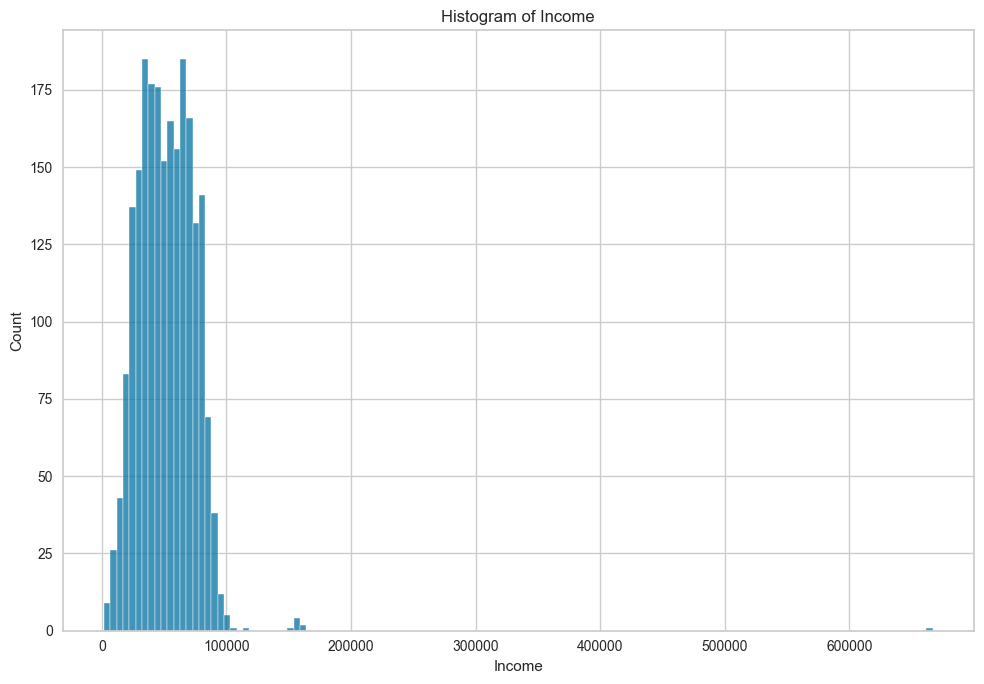

In [26]:
plt.figure(figsize=(10, 7))

sns.histplot(
    data=customer_personality_dataset,
    x='Income'
)

plt.title('Histogram of Income')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

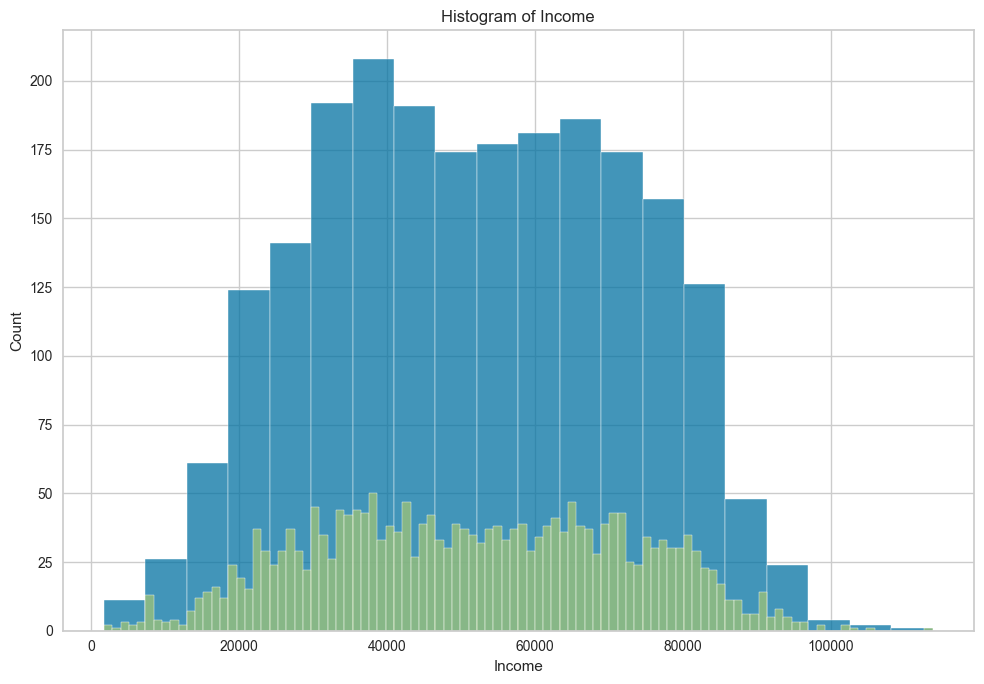

In [27]:
plt.figure(figsize=(10, 7))

sns.histplot(
    data=customer_personality_dataset[customer_personality_dataset['Income'] < 120000]['Income'],
    bins=20
)

sns.histplot(
    data=customer_personality_dataset[customer_personality_dataset['Income'] < 120000]['Income'],
    bins=100
)

plt.title('Histogram of Income')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

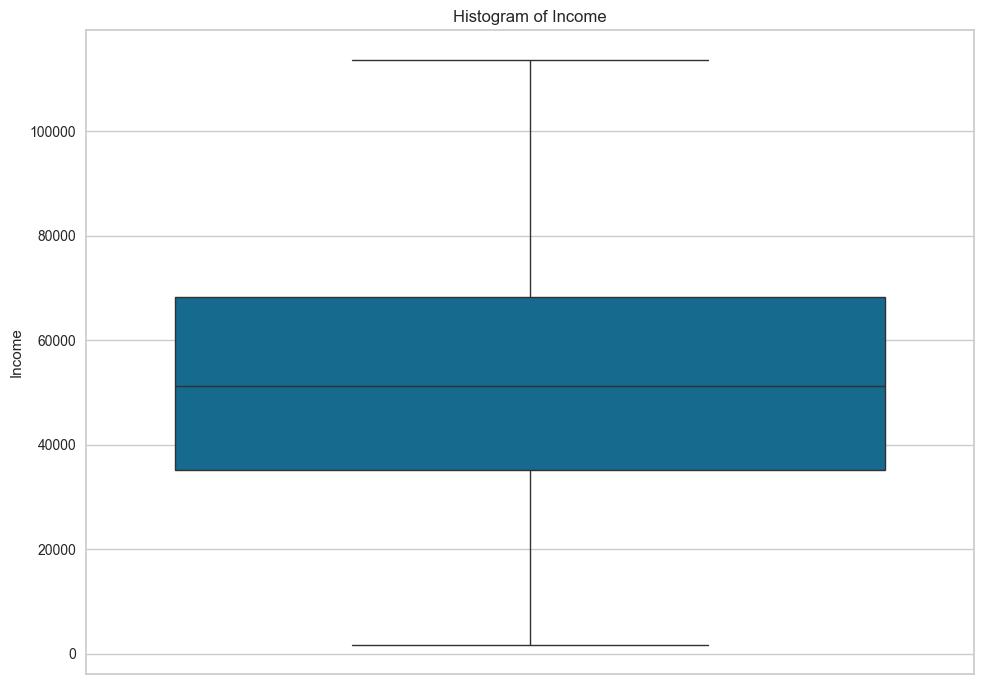

In [28]:
plt.figure(figsize=(10, 7))

sns.boxplot(
    data=customer_personality_dataset[customer_personality_dataset['Income'] < 120000]['Income'],
)

plt.title('Histogram of Income')
plt.tight_layout()
plt.show()

In [29]:
customer_personality_dataset

,Year_Birth,Education,Is_Single,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spending,Total_Purchases,Total_Children,Customer_Tenure,Age
0,1957,2,1,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,1,1617,22,0,849,58
1,1954,2,1,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,27,4,2,299,61
2,1965,2,0,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,776,20,0,498,50
3,1984,2,0,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,53,6,1,325,31
4,1981,4,0,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,422,14,1,347,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,0,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,0,1341,16,1,567,48
2236,1946,4,0,64014.0,2,1,2014-06-10,56,406,0,...,0,1,0,0,0,444,15,3,205,69
2237,1981,2,1,56981.0,0,0,2014-01-25,91,908,48,...,0,0,0,0,0,1241,18,0,341,34
2238,1956,3,0,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,843,21,1,342,59


In [30]:
customer_personality_dataset[customer_personality_dataset['Income'] > 120000].index

Index([164, 617, 655, 687, 1300, 1653, 2132, 2233], dtype='int64')

In [31]:
customer_personality_dataset.drop(index=customer_personality_dataset[customer_personality_dataset['Income'] > 120000].index, inplace=True)

In [32]:
customer_personality_dataset.reset_index(drop=True, inplace=True)

In [33]:
customer_personality_dataset['Income'] = customer_personality_dataset['Income'].fillna(customer_personality_dataset['Income'].mean())

In [34]:
customer_personality_dataset

,Year_Birth,Education,Is_Single,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spending,Total_Purchases,Total_Children,Customer_Tenure,Age
0,1957,2,1,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,1,1617,22,0,849,58
1,1954,2,1,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,27,4,2,299,61
2,1965,2,0,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,776,20,0,498,50
3,1984,2,0,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,53,6,1,325,31
4,1981,4,0,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,422,14,1,347,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,1967,2,0,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,0,1341,16,1,567,48
2228,1946,4,0,64014.0,2,1,2014-06-10,56,406,0,...,0,1,0,0,0,444,15,3,205,69
2229,1981,2,1,56981.0,0,0,2014-01-25,91,908,48,...,0,0,0,0,0,1241,18,0,341,34
2230,1956,3,0,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,843,21,1,342,59


In [71]:
customer_personality_dataset_orig_copy = customer_personality_dataset.copy()
customer_personality_dataset_orig_copy

,Year_Birth,Education,Is_Single,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spending,Total_Purchases,Total_Children,Customer_Tenure,Age
0,1957,2,1,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,1,1617,22,0,849,58
1,1954,2,1,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,27,4,2,299,61
2,1965,2,0,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,776,20,0,498,50
3,1984,2,0,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,53,6,1,325,31
4,1981,4,0,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,422,14,1,347,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,1967,2,0,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,0,1341,16,1,567,48
2228,1946,4,0,64014.0,2,1,2014-06-10,56,406,0,...,0,1,0,0,0,444,15,3,205,69
2229,1981,2,1,56981.0,0,0,2014-01-25,91,908,48,...,0,0,0,0,0,1241,18,0,341,34
2230,1956,3,0,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,843,21,1,342,59


In [35]:
print(customer_personality_dataset.isnull().sum())

Year_Birth             0
Education              0
Is_Single              0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Total_Spending         0
Total_Purchases        0
Total_Children         0
Customer_Tenure        0
Age                    0
dtype: int64


In [36]:
selected_features = ['Education', 'Is_Single', 'Income', 'Recency', 'Total_Spending', 'Total_Purchases', 'Total_Children', 'Customer_Tenure', 'Age']
customer_personality_dataset = customer_personality_dataset[selected_features]
customer_personality_dataset

,Education,Is_Single,Income,Recency,Total_Spending,Total_Purchases,Total_Children,Customer_Tenure,Age
0,2,1,58138.0,58,1617,22,0,849,58
1,2,1,46344.0,38,27,4,2,299,61
2,2,0,71613.0,26,776,20,0,498,50
3,2,0,26646.0,26,53,6,1,325,31
4,4,0,58293.0,94,422,14,1,347,34
...,...,...,...,...,...,...,...,...,...
2227,2,0,61223.0,46,1341,16,1,567,48
2228,4,0,64014.0,56,444,15,3,205,69
2229,2,1,56981.0,91,1241,18,0,341,34
2230,3,0,69245.0,8,843,21,1,342,59


### Silhouette Score

In [37]:
standard_scaler = StandardScaler()
customer_personality_scaled_features = pd.DataFrame(data=standard_scaler.fit_transform(customer_personality_dataset.drop(columns=['Education', 'Is_Single'])),
                                                    index=customer_personality_dataset.drop(columns=['Education', 'Is_Single']).index,
                                                    columns=customer_personality_dataset.drop(columns=['Education', 'Is_Single']).columns)
customer_personality_scaled_features.describe()

,Income,Recency,Total_Spending,Total_Purchases,Total_Children,Customer_Tenure,Age
count,2.232000e+03,2.232000e+03,2.232000e+03,2.232000e+03,2.232000e+03,2.232000e+03,2.232000e+03
mean,1.337043e-16,-1.030637e-16,3.660950e-17,4.218052e-17,-4.138466e-17,-2.538790e-16,1.317146e-16
std,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00
min,-2.422854e+00,-1.696622e+00,-9.988141e-01,-1.746804e+00,-1.266161e+00,-1.748714e+00,-2.269622e+00
25%,-7.864665e-01,-8.675036e-01,-8.923797e-01,-9.111537e-01,-1.266161e+00,-8.547430e-01,-6.846575e-01
50%,-3.283875e-03,-3.838511e-03,-3.477350e-01,-7.550308e-02,6.438104e-02,7.079814e-03,-1.007234e-01
75%,8.003264e-01,8.598265e-01,7.294974e-01,7.601476e-01,6.438104e-02,8.676661e-01,8.168874e-01
max,3.015013e+00,1.723492e+00,3.192040e+00,2.709999e+00,2.725464e+00,1.708469e+00,6.322552e+00


In [38]:
# customer_personality_scaled_features = pd.concat([customer_personality_scaled_features, customer_personality_dataset[['Education', 'Is_Single']]], axis=1)
customer_personality_scaled_features = customer_personality_scaled_features
customer_personality_scaled_features

,Income,Recency,Total_Spending,Total_Purchases,Total_Children,Customer_Tenure,Age
0,0.315791,0.307081,1.682002,1.317248,-1.266161,1.530417,0.983726
1,-0.256815,-0.383851,-0.962227,-1.189704,1.394923,-1.189828,1.233983
2,0.970011,-0.798410,0.283388,1.038698,-1.266161,-0.205594,0.316372
3,-1.213166,-0.798410,-0.918988,-0.911154,0.064381,-1.061234,-1.268592
4,0.323316,1.550759,-0.305328,0.203047,0.064381,-0.952424,-1.018334
...,...,...,...,...,...,...,...
2227,0.465570,-0.107478,1.223004,0.481597,0.064381,0.135673,0.149534
2228,0.601075,0.237988,-0.268741,0.342322,2.725464,-1.654742,1.901336
2229,0.259618,1.447119,1.056700,0.760148,-1.266161,-0.982100,-1.018334
2230,0.855043,-1.420249,0.394811,1.177973,0.064381,-0.977154,1.067145


In [39]:
final_dataset_copy = customer_personality_dataset.copy()
# final_dataset_copy = customer_personality_scaled_features.copy()
final_dataset_copy

,Education,Is_Single,Income,Recency,Total_Spending,Total_Purchases,Total_Children,Customer_Tenure,Age
0,2,1,58138.0,58,1617,22,0,849,58
1,2,1,46344.0,38,27,4,2,299,61
2,2,0,71613.0,26,776,20,0,498,50
3,2,0,26646.0,26,53,6,1,325,31
4,4,0,58293.0,94,422,14,1,347,34
...,...,...,...,...,...,...,...,...,...
2227,2,0,61223.0,46,1341,16,1,567,48
2228,4,0,64014.0,56,444,15,3,205,69
2229,2,1,56981.0,91,1241,18,0,341,34
2230,3,0,69245.0,8,843,21,1,342,59


In [40]:
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def draw_silhouette_plot(X, clusterer, n_clusters, ax):
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    ax.set_xlim([-1, 1])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    ax.set_yticks([])
    ax.set_xticks(np.arange(-1, 1.1, 0.2))

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        y_lower = y_upper + 1

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_title(f'The Silhouette Plot for n_clusters={n_clusters}')
    ax.legend([f'Cluster {i+1}' for i in range(
        n_clusters)] + ['Silhouette Score'])

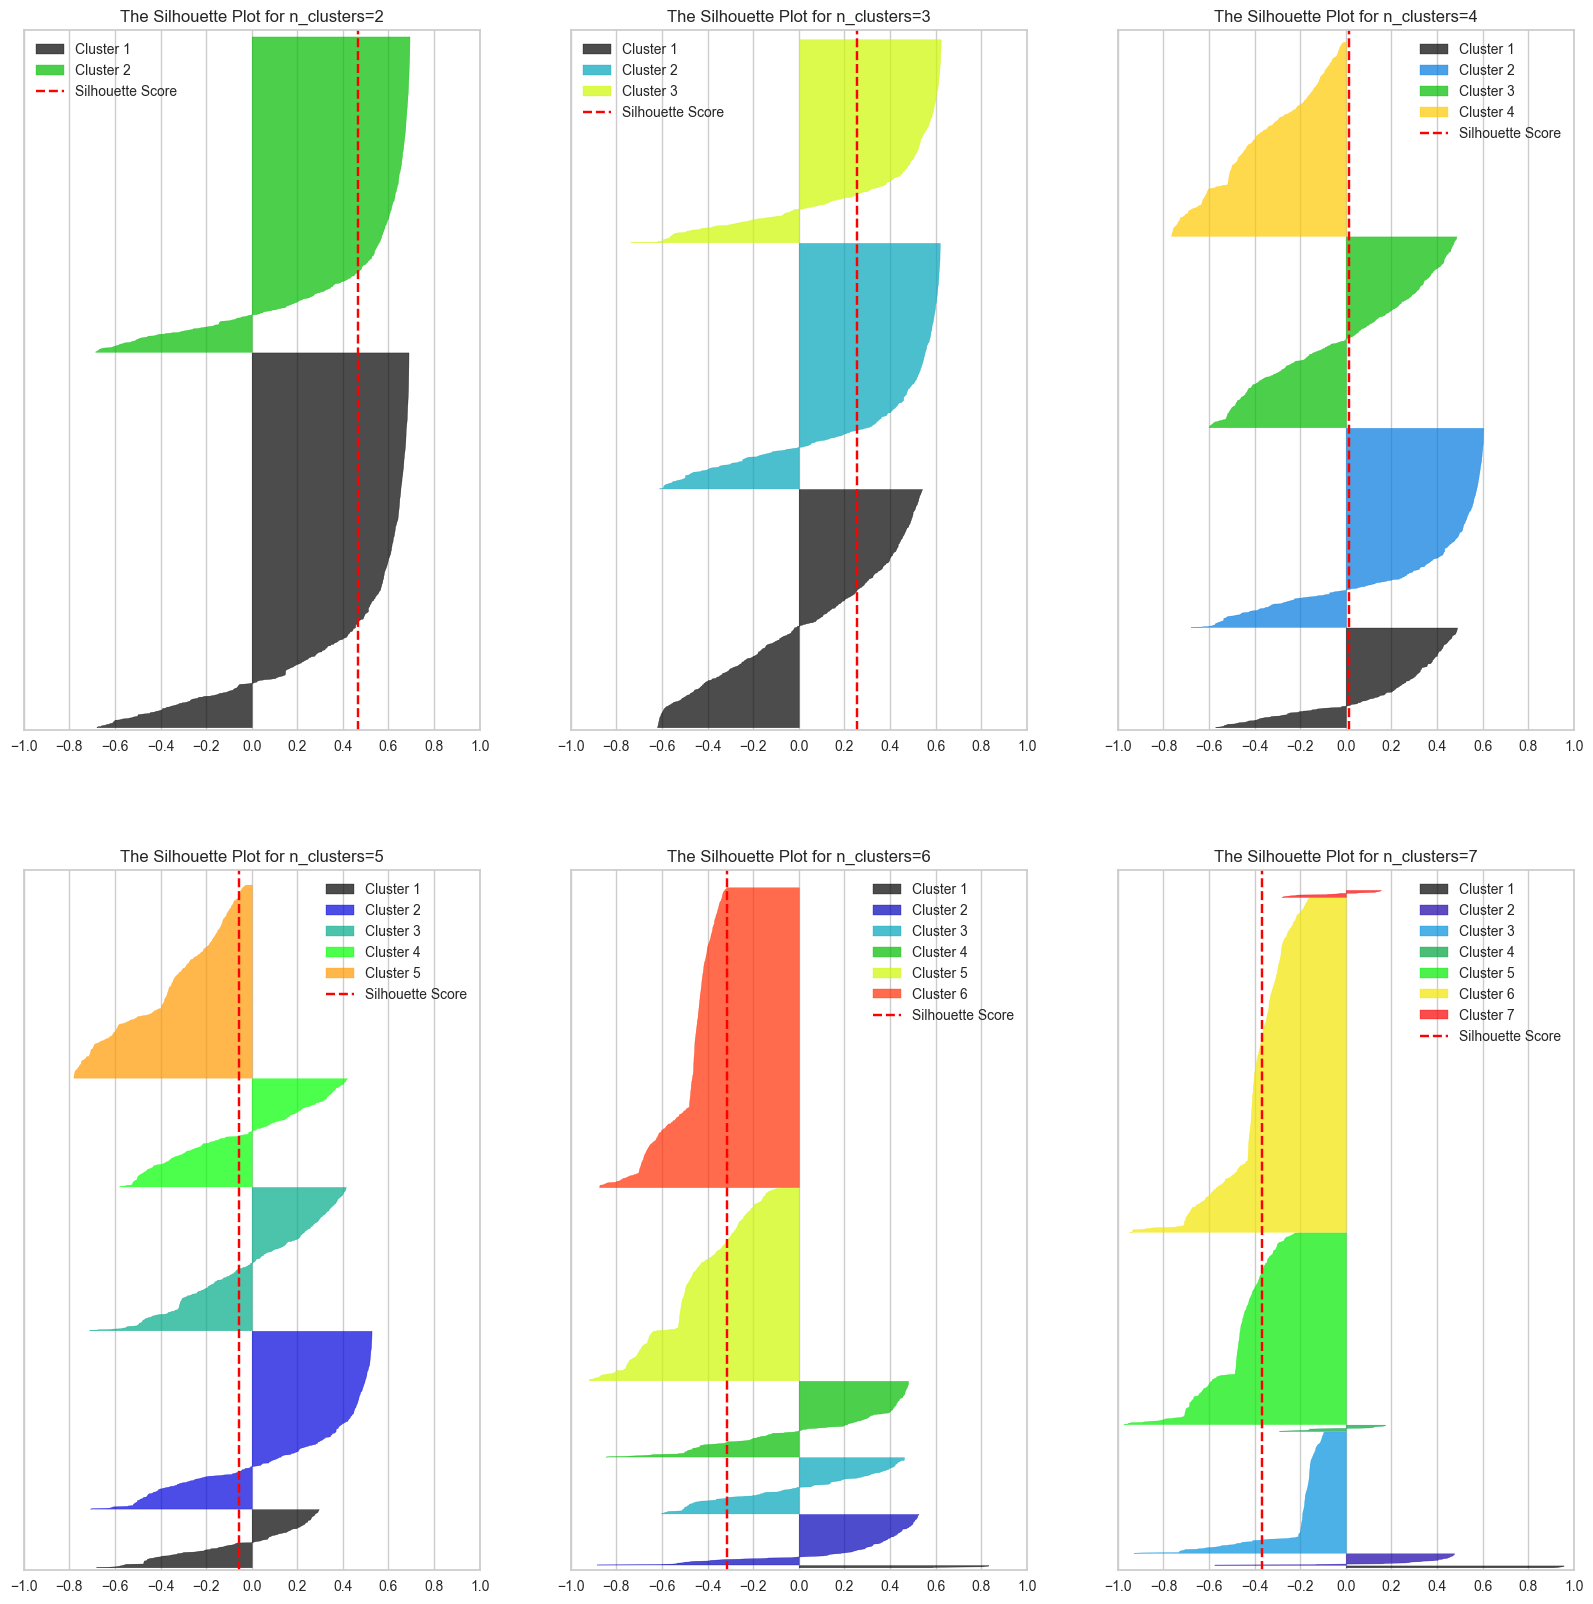

In [41]:
num_components_range = range(2, 8)
fig, axes = plt.subplots(2, 3, figsize=(20, 20))

for num_components_param in num_components_range:
    gmm_model = GaussianMixture(n_components=num_components_param, n_init=10, random_state=69)
    ax = axes[(num_components_param - 2) // 3][(num_components_param - 2) % 3]
    draw_silhouette_plot(final_dataset_copy, gmm_model, num_components_param, ax)

In [42]:
customer_personality_scaled_features = pd.concat([customer_personality_scaled_features,
                                                  final_dataset_copy[['Education', 'Is_Single']]],
                                                 axis=1)
customer_personality_scaled_features

,Income,Recency,Total_Spending,Total_Purchases,Total_Children,Customer_Tenure,Age,Education,Is_Single
0,0.315791,0.307081,1.682002,1.317248,-1.266161,1.530417,0.983726,2,1
1,-0.256815,-0.383851,-0.962227,-1.189704,1.394923,-1.189828,1.233983,2,1
2,0.970011,-0.798410,0.283388,1.038698,-1.266161,-0.205594,0.316372,2,0
3,-1.213166,-0.798410,-0.918988,-0.911154,0.064381,-1.061234,-1.268592,2,0
4,0.323316,1.550759,-0.305328,0.203047,0.064381,-0.952424,-1.018334,4,0
...,...,...,...,...,...,...,...,...,...
2227,0.465570,-0.107478,1.223004,0.481597,0.064381,0.135673,0.149534,2,0
2228,0.601075,0.237988,-0.268741,0.342322,2.725464,-1.654742,1.901336,4,0
2229,0.259618,1.447119,1.056700,0.760148,-1.266161,-0.982100,-1.018334,2,1
2230,0.855043,-1.420249,0.394811,1.177973,0.064381,-0.977154,1.067145,3,0


In [43]:
pca = PCA(n_components=2)
pca.fit(customer_personality_scaled_features)
X_pca = pca.transform(customer_personality_scaled_features)

In [44]:
X_pca

array([[ 2.41109882, -0.73721801],
       [-1.74144596,  1.41839922],
       [ 1.59675348, -0.44295983],
       ...,
       [ 1.29199835, -1.17982957],
       [ 1.36909954,  1.34354465],
       [-0.73053186,  1.92840362]], shape=(2232, 2))

<Axes: >

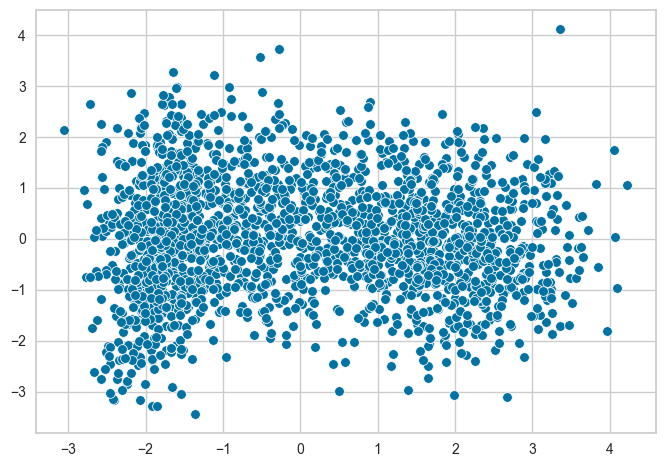

In [45]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1])

In [46]:
from matplotlib.patches import Ellipse
def plot_gmm(gmm, X, label=True, ax=None):
    def draw_ellipse(position, covariance, ax=None, **kwargs):
        ax = ax or plt.gca()
        if covariance.shape == (2, 2):
            U, s, Vt = np.linalg.svd(covariance)
            angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
            width, height = 2 * np.sqrt(s)
        else:
            angle = 0
            width, height = 2 * np.sqrt(covariance), 2 * np.sqrt(covariance)

        for nsig in range(1, 4):
            ax.add_patch(Ellipse(xy=position, width=nsig * width, height=nsig * height, angle=angle, **kwargs))
    
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=7, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=7, zorder=2)
        ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

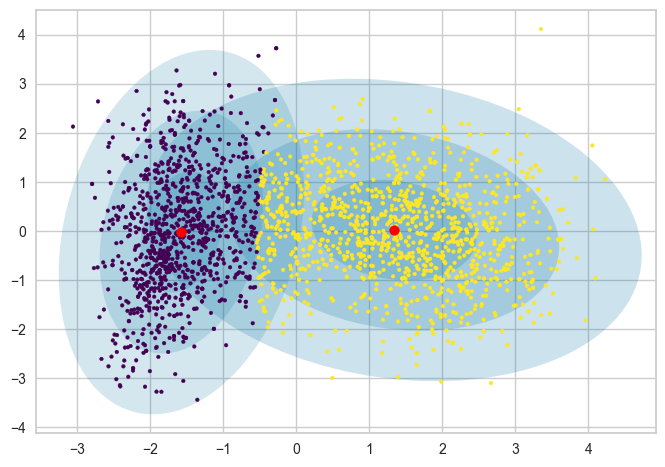

In [54]:
gmm_model = GaussianMixture(n_components=2, random_state=69, covariance_type='full')
gmm_model.fit(X_pca)
y_hat = gmm_model.predict(X_pca)
means = gmm_model.means_

plot_gmm(gmm_model, X_pca)
plt.scatter(means[:, 0], means[:, 1], c='red', zorder=3)
plt.show()

In [55]:
means_pca_inverse = pca.inverse_transform(means)

numerical_columns = means_pca_inverse[:, :7]
categorical_columns = means_pca_inverse[:, 7:]

numerical_original = standard_scaler.inverse_transform(numerical_columns)
means_full_original = np.hstack([numerical_original, categorical_columns])

means_scaled_inverse_df = pd.DataFrame(data=means_full_original, columns=customer_personality_scaled_features.columns)
means_scaled_inverse_df

,Income,Recency,Total_Spending,Total_Purchases,Total_Children,Customer_Tenure,Age,Education,Is_Single
0,34595.530209,48.740713,86.848063,6.564191,1.335667,514.996476,43.624143,2.272202,0.347249
1,66130.296483,49.426259,1046.966716,17.628355,0.624845,560.475385,48.405400,2.615872,0.363784


As it may be seen, I got 2 main clusters with different information about each one of them.
* Cluster 0 - Low Income, Low Total Spending, Low Total Purchases, Higher probability of having at least one child, Lower Tenure, Younger, Education close to Graduated Status.
* Cluster 1 - High Income, High Total Spending, High Total Purchases, Lower Probability of not having a child in the family, Higher Tenure, Older, Education close to Master.

In [56]:
customer_personality_scaled_features.groupby(y_hat).mean()

,Income,Recency,Total_Spending,Total_Purchases,Total_Children,Customer_Tenure,Age,Education,Is_Single
0,-0.836225,0.002130,-0.839506,-0.913170,0.479212,-0.144419,-0.217317,2.317568,0.354247
1,0.724356,-0.001845,0.727198,0.791007,-0.415103,0.125099,0.188244,2.579431,0.357860


In [57]:
centers = standard_scaler.inverse_transform(customer_personality_scaled_features.drop(columns=['Education', 'Is_Single']))

df = pd.concat([pd.DataFrame(data=centers, columns=customer_personality_scaled_features.drop(columns=['Education', 'Is_Single']).columns),
                customer_personality_scaled_features[['Education', 'Is_Single']]],
               axis=1)
df

,Income,Recency,Total_Spending,Total_Purchases,Total_Children,Customer_Tenure,Age,Education,Is_Single
0,58138.0,58.0,1617.0,22.0,0.0,849.0,58.0,2,1
1,46344.0,38.0,27.0,4.0,2.0,299.0,61.0,2,1
2,71613.0,26.0,776.0,20.0,0.0,498.0,50.0,2,0
3,26646.0,26.0,53.0,6.0,1.0,325.0,31.0,2,0
4,58293.0,94.0,422.0,14.0,1.0,347.0,34.0,4,0
...,...,...,...,...,...,...,...,...,...
2227,61223.0,46.0,1341.0,16.0,1.0,567.0,48.0,2,0
2228,64014.0,56.0,444.0,15.0,3.0,205.0,69.0,4,0
2229,56981.0,91.0,1241.0,18.0,0.0,341.0,34.0,2,1
2230,69245.0,8.0,843.0,21.0,1.0,342.0,59.0,3,0


In [58]:
df.groupby(y_hat).mean()

,Income,Recency,Total_Spending,Total_Purchases,Total_Children,Customer_Tenure,Age,Education,Is_Single
0,34409.870059,49.172780,100.793436,5.985521,1.311776,510.368726,43.602317,2.317568,0.354247
1,66553.223189,49.057692,1042.867057,18.221572,0.639632,564.862040,48.464047,2.579431,0.357860


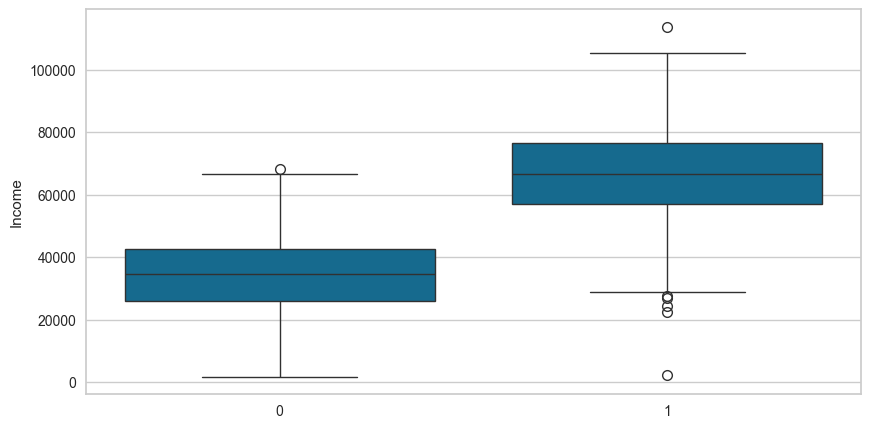

In [59]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=y_hat, y=df['Income'])
plt.show()

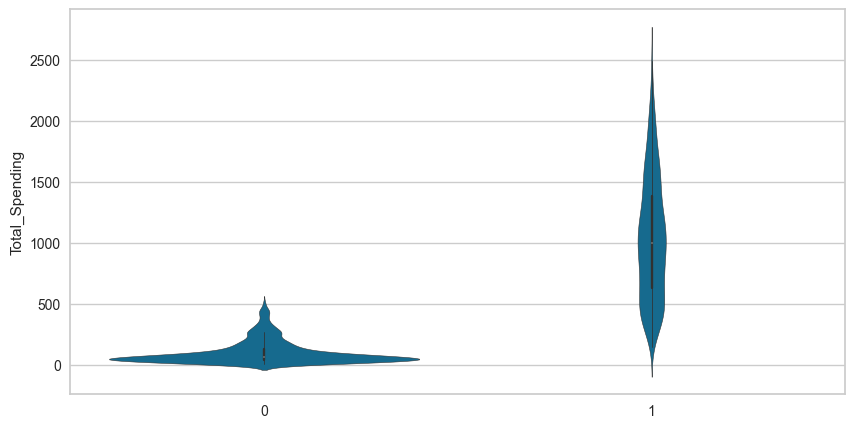

In [60]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=y_hat, y=df['Total_Spending'])
plt.show()

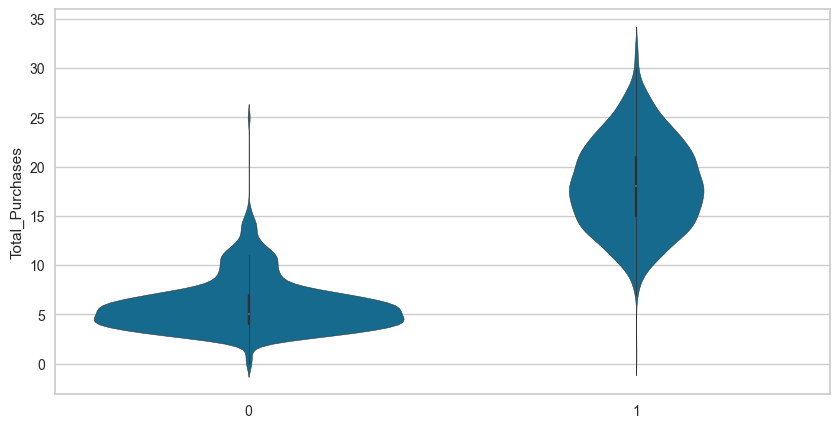

In [61]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=y_hat, y=df['Total_Purchases'])
plt.show()

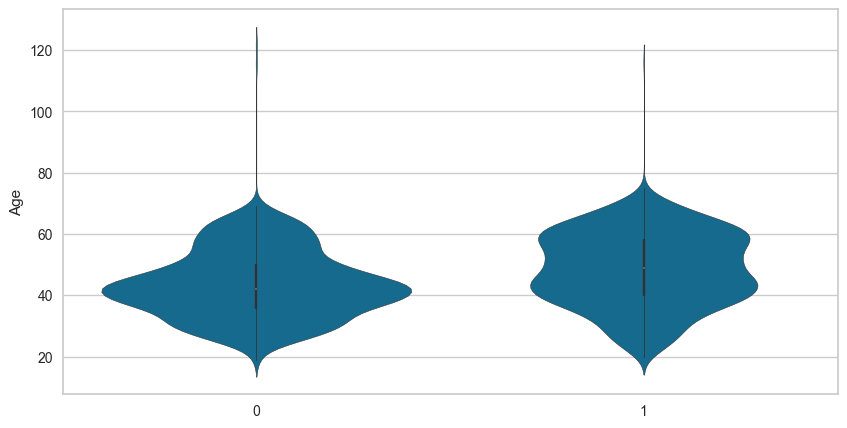

In [62]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=y_hat, y=df['Age'])
plt.show()

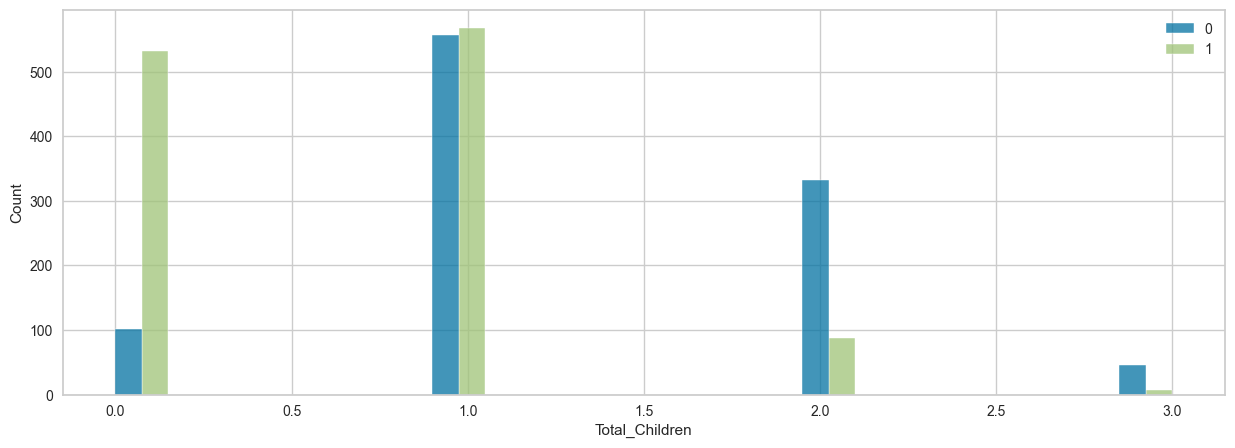

In [63]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x="Total_Children", hue=y_hat, stat='count', multiple='dodge')
plt.show()

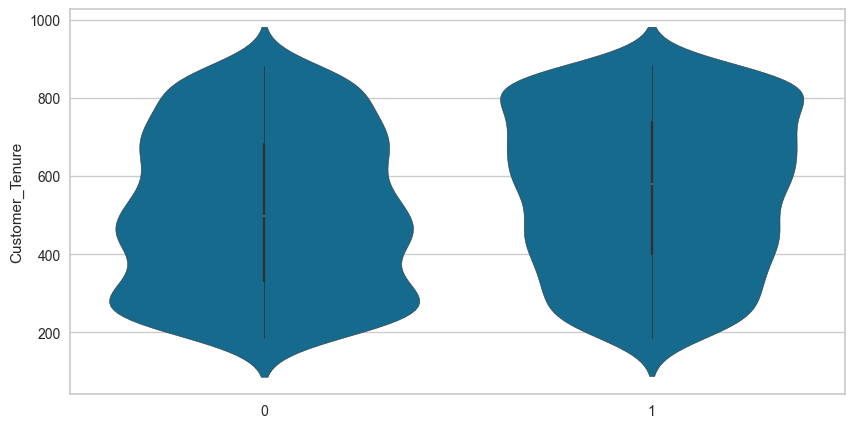

In [64]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=y_hat, y=df['Customer_Tenure'])
plt.show()

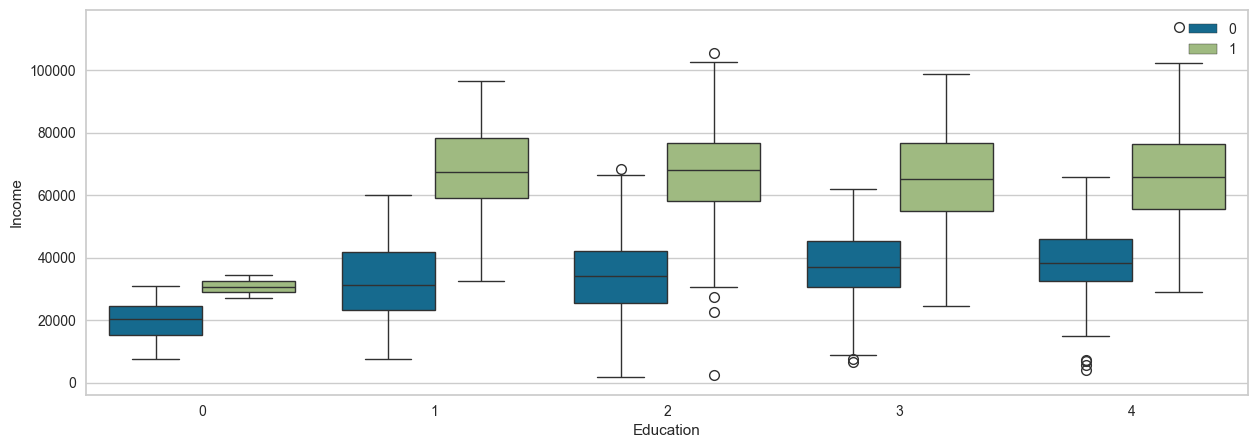

In [179]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="Education", y="Income", hue=y_hat)
plt.show()

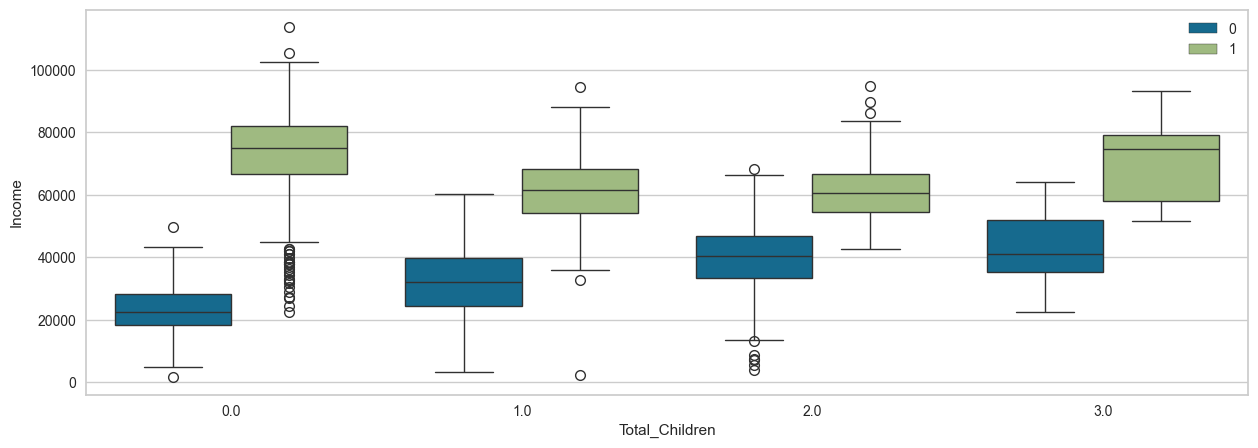

In [186]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="Total_Children", y="Income", hue=y_hat)
plt.show()